# Homework 1

In this homework you are going to implement and test linear model fitting functions, and data quality checking functions. You will need to install (at least) python, jupyter, matplotlib, and numpy to do this assignment. Installing anaconda is a quick way to get all of those things.

There are 4 problems worth a total of 32 points. The description for each problem will tell you how many points each part is worth.

You should not need to edit the boilerplate code in this notebook, but wherever you see `## YOUR CODE HERE ##`, you should replace that with your own code (obviously).

To turn in your homework, email your finished `.ipynb` file to `huth@cs.utexas.edu`. This homework is due on 10/17.

<font color="red">
Comments and grades will look like this, and will appear below each answer.
<p></p>
Total score: min((31+3) / 32, 1.0) = 100%  Great job!
</font>

In [1]:
# Dependencies
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1 - Data Quality (5/6 pts) + 3 bonus pts
**Before you do anything else, _make sure your data is good_.**

In this problem you will implement a few different methods for checking data quality. You will also answer brief questions about them.

In [8]:
# Make testing data

def q_make_data(signal_size, n_repeats, n_timepoints):
    signal = np.random.randn(n_timepoints)
    data = np.random.randn(n_repeats, n_timepoints) + (signal_size ** 0.5 * signal)
    return data

q_data = q_make_data(signal_size=0.5, n_repeats=50, n_timepoints=300)

# The scenario: you've done 50 repeats of the same 300-second experiment, 
# while measuring the output of 1 neuron
# q_data is a 50 x 300 matrix with the output at each second in each of the 50 repeats
print (q_data.shape)

(50, 300)


### (a) - Signal to Noise Ratio (SNR) (1/1 pt)

Write code that computes the SNR of your measurement, `q_data`. Don't use the bias correction factor that we talked about in class.

In [9]:
def snr_func(data):
    ## YOUR CODE HERE ##
    
    x_= np.mean(data, axis=0) #\bar x
    var_x_= np.var(x_)  #var(\bar x)
    
    x_dif_var_i = np.array([np.var(data[i,:] - x_) for i in range(len(data))])
    x_dif_var_mean = np.mean(x_dif_var_i) #mean over i
        
    snr=var_x_/x_dif_var_mean  #definition of snr by notebook
    return snr    

print('Estimated SNR:', snr_func(q_data))

Estimated SNR: 0.527907919952


### (b) - Explainable Variance (EV) (1/1 pt)

Write code that computes the EV of your measurement, `q_data`. Don't use the bias correction factor that we talked about in class.

In [11]:
def ev_func(data):
    ## YOUR CODE HERE ##
    x_ = np.mean(data, axis=0) #\bar x
    x_dif_var_i = np.array([np.var(data[i,:]-x_) for i in range(len(data))])
    var_xi = np.array([np.var(data[i,:]) for i in range(len(data))])
    ev=1-np.sum(x_dif_var_i)/np.sum(var_xi) #definition of ev by notebook
    
    return ev
    
print('Estimated EV:', ev_func(q_data))

Estimated EV: 0.345510297485


### (c) - Test how SNR and EV depend on the number of repetitions (2/3 pts)
Run the two following cells using the `snr_func` and `ev_func` that you defined above, then answer the questions below.

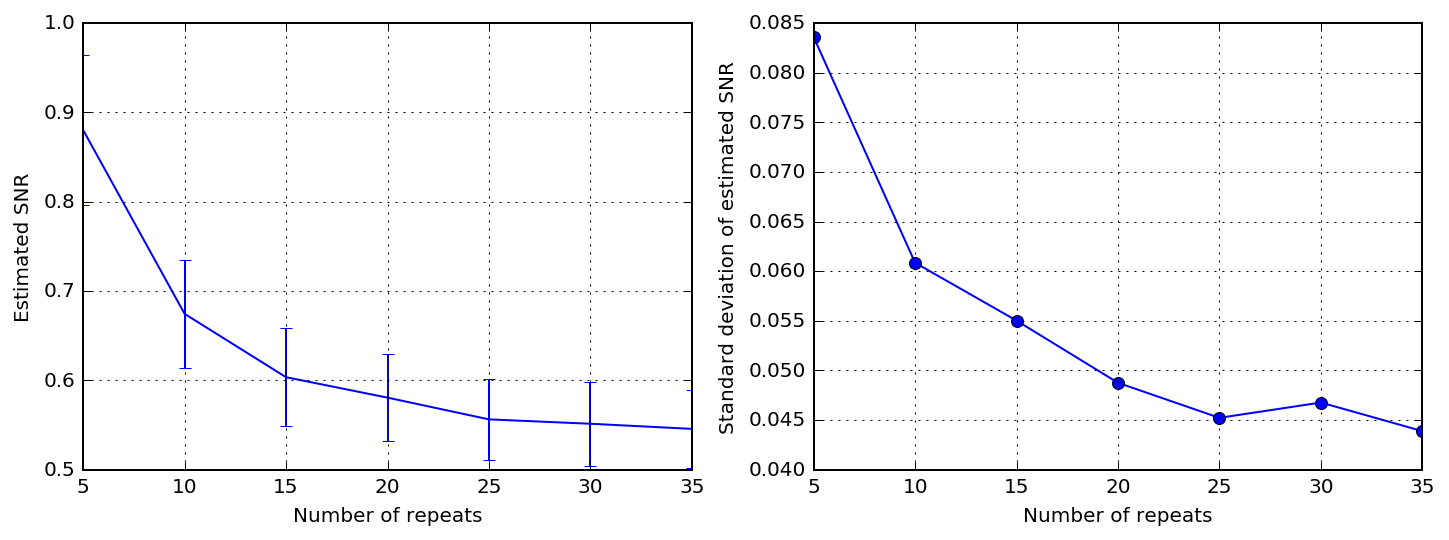

In [12]:
n_tests = 150
n_repeats = np.arange(5, 40, 5)

snr_estimates = np.array([[snr_func(q_make_data(signal_size=0.5, n_repeats=r, n_timepoints=300)) 
                           for _ in range(n_tests)] 
                          for r in n_repeats])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_repeats, snr_estimates.mean(1), yerr=snr_estimates.std(1))
plt.xlabel('Number of repeats')
plt.ylabel('Estimated SNR')
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_repeats, snr_estimates.std(1), 'o-')
plt.xlabel('Number of repeats')
plt.ylabel('Standard deviation of estimated SNR')
plt.grid();

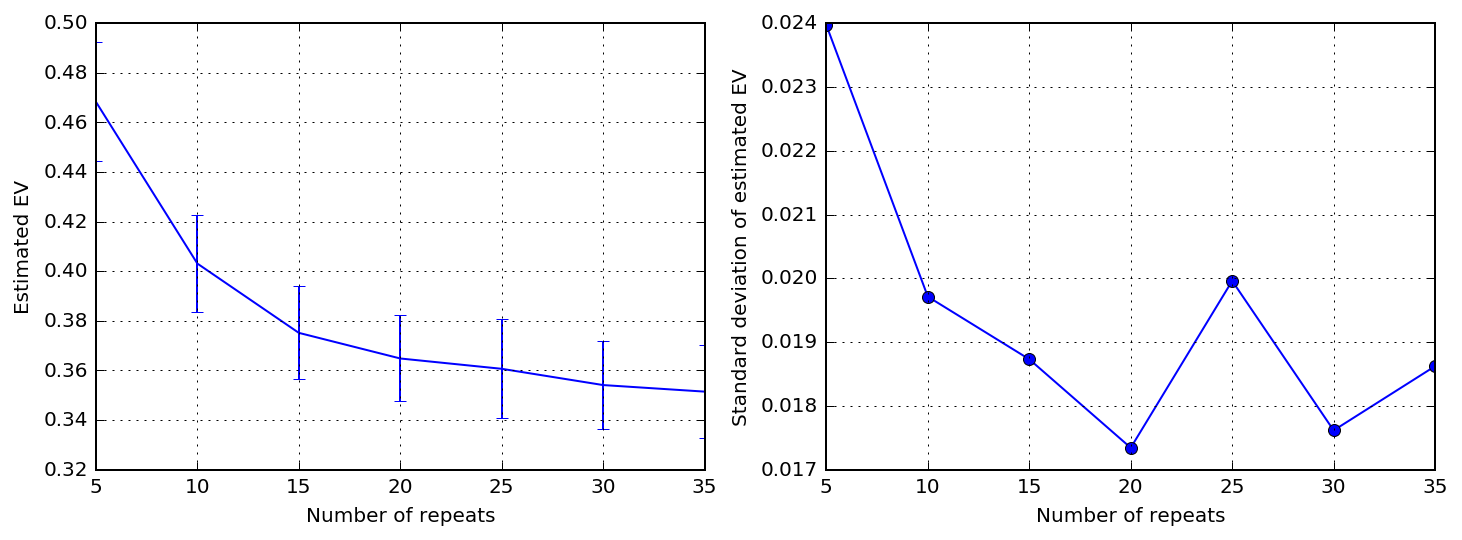

In [13]:
ev_estimates = np.array([[ev_func(q_make_data(signal_size=0.5, n_repeats=r, n_timepoints=300)) 
                          for _ in range(n_tests)] 
                         for r in n_repeats])


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_repeats, ev_estimates.mean(1), yerr=ev_estimates.std(1))
plt.xlabel('Number of repeats')
plt.ylabel('Estimated EV')
plt.grid();

plt.subplot(1,2,2)
plt.plot(n_repeats, ev_estimates.std(1), 'o-')
plt.xlabel('Number of repeats')
plt.ylabel('Standard deviation of estimated EV')
plt.grid();

### (c - continued) Questions
Please answer each question below by modifying this cell.

#### i. We know that $data = noise + \sqrt{0.5} * signal$. What would the SNR be if we had an infinite amount of data? Why? (1/1 pt)
Method 1: From the plot above, the SNR would approach to 0.5 if number of repeats approaches infinite. 

Method 2: Also, as the amount of repeats goes to infinity, the SNR could be calculated by $SNR=\frac{var(s(t))}{var(\epsilon(t))}=\frac{0.5 \sigma^2}{\sigma^2}=0.5, where \sigma^2=$ variance of uniform distribution(rand func).

Method 3: From the defination of estimated SNR: $SNR=\frac{var(\bar{x}(t))}{<var(x_i(t)-\bar{x}(t))>_i}=\frac{var(s(t)+\bar{\epsilon(t)})}{\sum_i var(\epsilon_i(t)-\bar{\epsilon}(t))/N}=\frac{0.5 \sigma^2+\sigma^2/N}{\sigma^2+\sigma^2/N}\rightarrow0.5$

#### ii. What would the EV be if we had an infinite amount of data? (1/1 pt)
Method 1: From the plot above, the EV would aproach to 0.33 if number of repeats aproaches infinite.

Method 2: From the defination of estimated EV: $EV=1-\frac{\sum_i var(x_i(t)-\bar x(t))}{\sum_i var(x_i(t))}=1-\frac{var(\epsilon_i(t)-\bar \epsilon(t))}{var(s(t)+\epsilon_i(t))}=1-\frac{\sigma^2+\sigma^2/N}{0.5\sigma^2+\sigma^2}\rightarrow\frac{1}{3}$

#### ii. Our estimates of SNR and EV are biased. How does the bias change as we change the number of repeats? Why? (0/1 pt)
The bias of our estimates of SNR and EV would keep the same whlile changing the number of repeats, because the bias is determined by the estimate variance of $\sqrt{0.5}* signal$, where $E[var(signal)] = \sigma^2$.

<font color=red>
You can see in the graphs that the bias is decreasing as the number of repeats increases. As the number of repeats increases, the estimate of the signal gets closer to the actual signal, which decreases the bias.
</font>

### (d) - Test how SNR and EV depend on the number of timepoints (1/1 pt)
Similarly, run the two following cells using your functions, then answer the question below.

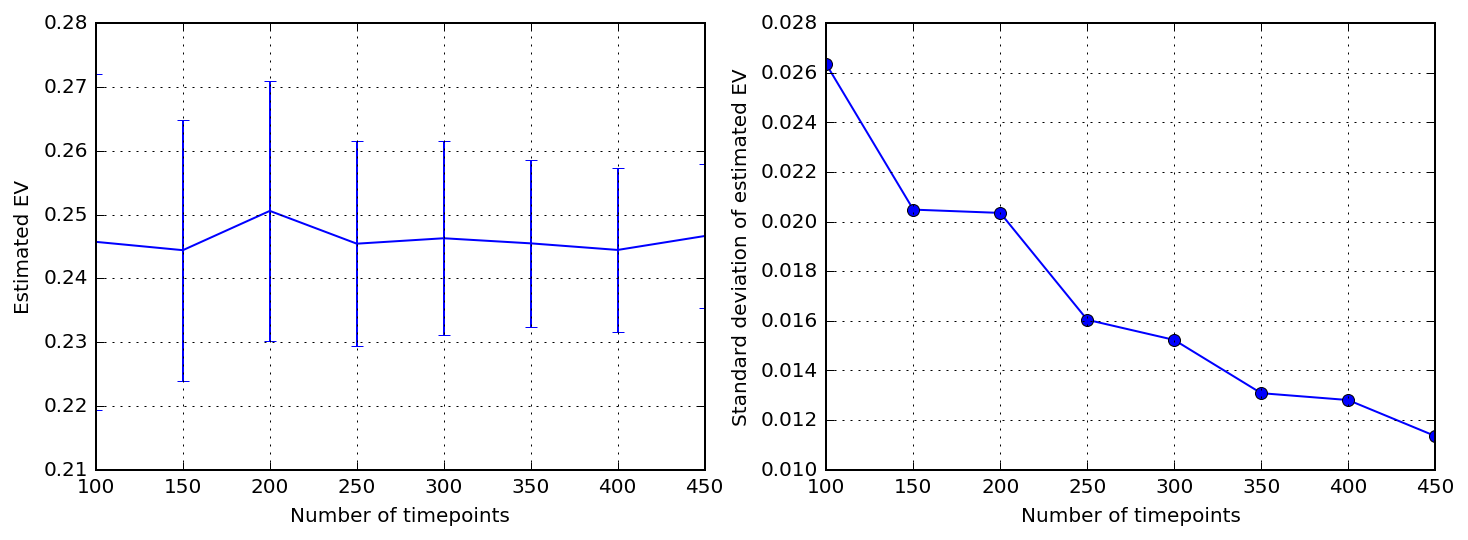

In [16]:
n_tests = 150
n_timepoints = np.arange(100, 500, 50)

ev_estimates = np.array([[ev_func(q_make_data(signal_size=0.3, n_repeats=50, n_timepoints=t)) 
                          for _ in range(n_tests)] 
                         for t in n_timepoints])


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_timepoints, ev_estimates.mean(1), yerr=ev_estimates.std(1))
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated EV')
plt.grid();

plt.subplot(1,2,2)
plt.plot(n_timepoints, ev_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated EV')
plt.grid();

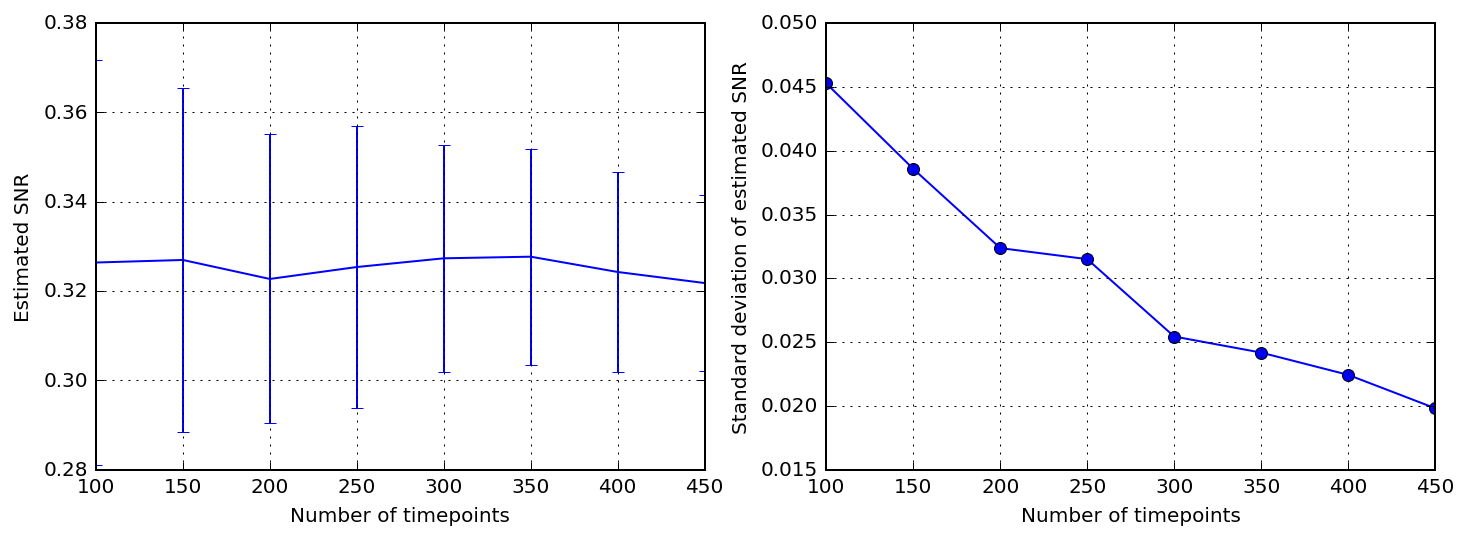

In [17]:


snr_estimates = np.array([[snr_func(q_make_data(signal_size=0.3, n_repeats=50, n_timepoints=t)) 
                           for _ in range(n_tests)] 
                          for t in n_timepoints])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_timepoints, snr_estimates.mean(1), yerr=snr_estimates.std(1))
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated SNR')
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_timepoints, snr_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated SNR')
plt.grid();

### (d - continued) Question

#### i. Does changing the number of timepoints affect the bias or the variance in our estimates of SNR and EV? (1/1 pt)
From these plots, we can say, increasing the number of timepoints does not affect the bias of our estimates of SNR or EV, but decreases the variance of our estimates of SNR and EV, because the value Estimate EV and SNR $\propto var(signal)$, while the standard deviation of the estimates of SNR and EV are $\propto \frac{var(signal)}{N_{timerepeats}}$

### (Bonus) (+3/3 pts)
Suppose you have enough time to collect 15,000 total datapoints, but you can choose whether you want to collect a lot of repetitions with a short experiment, or a few repetitions with a long experiment. Let's also suppose that the shortest experiment you can do would be 10 timepoints long. How would you set `n_repeats` and `n_timepoints` to get the best estimate of SNR or EV? And how would you define _best_?

C:\Users\Lixiang\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Lixiang\Anaconda3\lib\site-packages\numpy\core\_methods.py:101: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


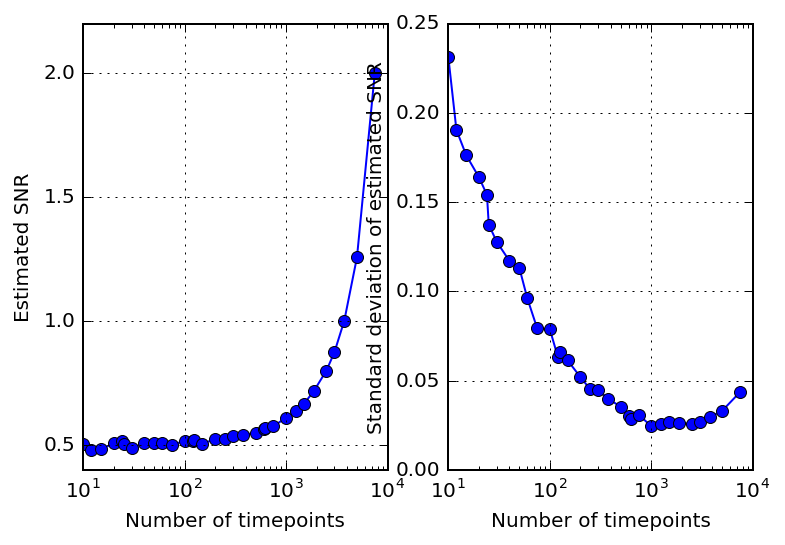

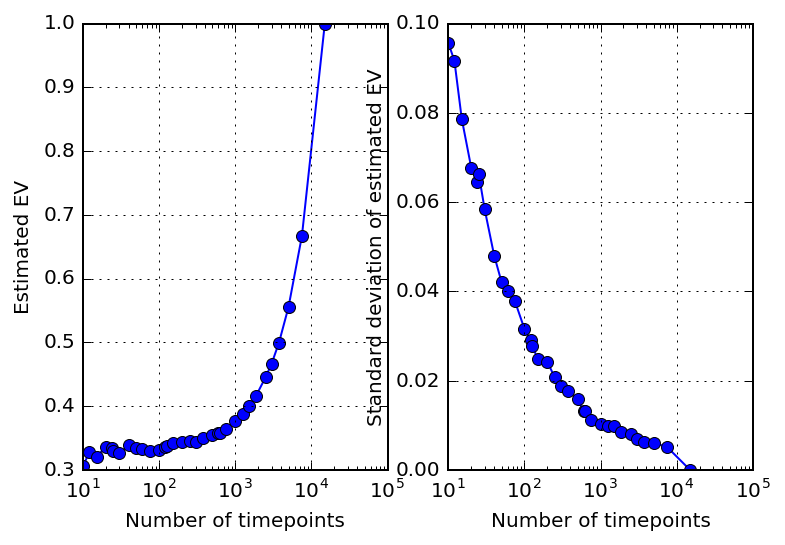

In [22]:
# Insert code for answering the bonus question here, if you want!
def factors(n):
    return [f for f in range(10,n+1) if n%f==0]

n_timepoints=factors(15000)
snr_estimates = np.array([[snr_func(q_make_data(signal_size=0.5, n_repeats=np.int(15000/t), n_timepoints=t)) 
                           for _ in range(n_tests)] 
                          for t in n_timepoints])
plt.subplot(1,2,1)
plt.semilogx(n_timepoints, snr_estimates.mean(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated SNR')
plt.grid();

plt.subplot(1,2,2)
plt.semilogx(n_timepoints, snr_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated SNR')
plt.grid();

ev_estimates = np.array([[ev_func(q_make_data(signal_size=0.5, n_repeats=np.int(15000/t), n_timepoints=t)) 
                           for _ in range(n_tests)] 
                          for t in n_timepoints])
plt.figure()
plt.subplot(1,2,1)
plt.semilogx(n_timepoints, ev_estimates.mean(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated EV')
plt.grid();

plt.subplot(1,2,2)
plt.semilogx(n_timepoints, ev_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated EV')
plt.grid();


Basing on the plots above, assuming $SNR\approx 1$ is acceptible quality of data, I would say, the number of timepoints around 375 is best, because: (1) the stdv of SNR is lowest, (2) the estimate EV is not low, (3) the stdv of EV is low.

<font color=red>
Great analysis! It's really interesting that the stdev of the SNR has a minimum at that number of timepoints.. that seems like a key point!
</font>

## Problem 2 - Gradient Descent (12/12 pts)

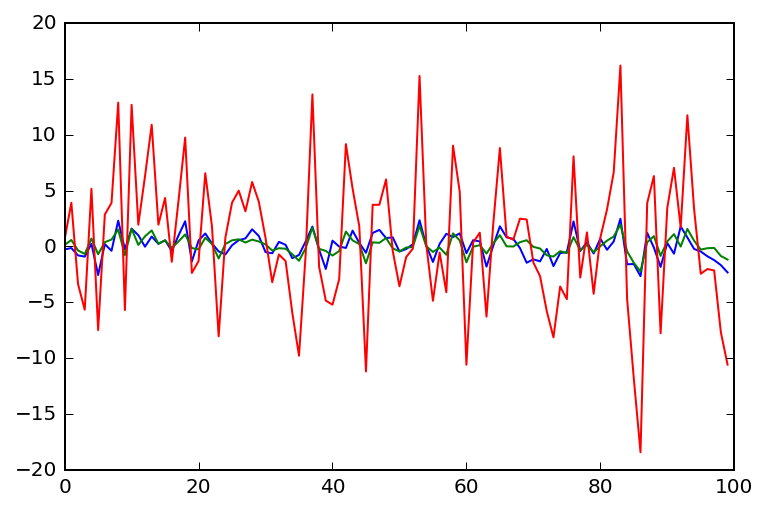

In [23]:
# Make testing data

def gd_make_data(nsamp=100, noise=0):    
    # Generate a two dimensional stimulus (e.g two pixels) with correlations and 100 samples (e.g. points in time)
    # First pixel data
    x1 = np.random.randn(nsamp)

    # Second pixel that is correlated with the first
    x2 = .4 * x1 + .6 * np.random.randn(nsamp)

    # Concatinate into a stimulus matrix - here rows are dimensions and columns are time points.
    x = np.vstack([x1, x2])

    ## Generate weights and the corresponding one dimensional response 
    # Set weights on each channel
    b = np.array([1, 7])

    # Make response of system - this is the output of our toy neuron
    y = np.dot(x.T, b) + np.random.randn(nsamp) * noise
    
    return x, y

x, y = gd_make_data()

# Plot timeseries
plt.plot(x[0])
plt.plot(x[1])
plt.plot(y);

In [30]:
# We are going to pretend we don't know h and make a search for h values by settting up 
# a range of potential values for h1 and h2

b1, b2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))
bs = np.vstack([b1.ravel(), b2.ravel()])

# get responses from each set of weights
ys = np.dot(x.T, bs)

# calculate error between the response, y, and each of the possible responses, ys.  
errfun = np.sum((y[:,None] - ys) ** 2, 0)

# reshape for plotting
errfun = errfun.reshape(b1.shape)

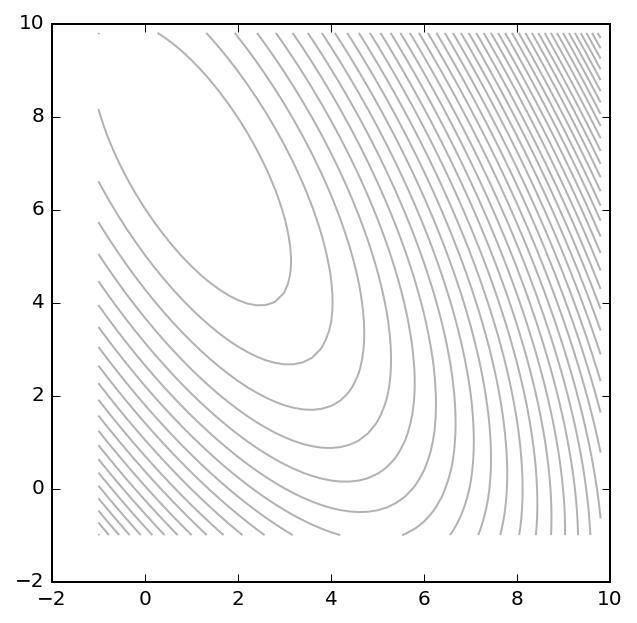

In [31]:
## plot contour of error surface. Note the shape of the surface is angled
# because the two variable are correlated.
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3);
plt.axis('equal');

### (a) Gradient Descent (3/3 pts)
One way to solve this problem is using gradient descent. Take the derivative of the error function, and then take small steps along that derivative (i.e. add the step multiplied by a small step size, `eps` to your estimate of beta).

For this problem, the features are in the variable `x`, and the response is in the variable `y`.

Write code that uses gradient descent to solve this problem. Store the estimated betas after each gradient step, and then plot the path that the gradient descent took (i.e. the values of all the betas along the way) on top of the error contours.

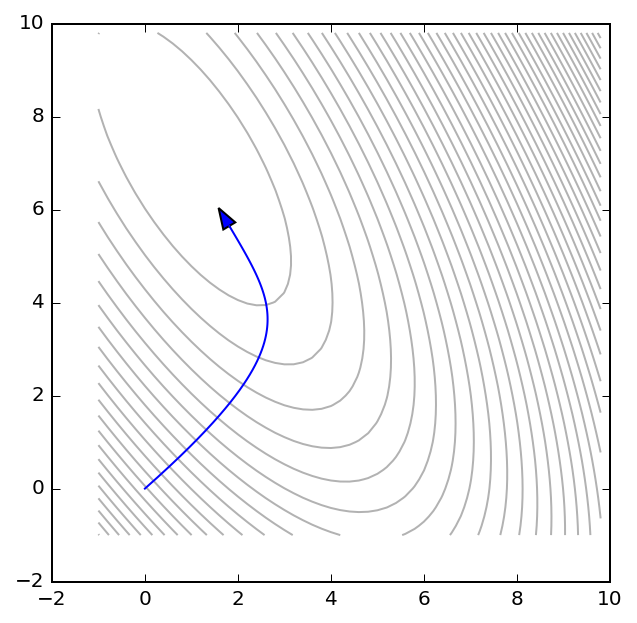

In [33]:
# Gradient descent!

steps = 100 # how many steps to take
eps = 0.001 # the size of each step

b_est = np.array([0.0, 0.0]) # store your current estimate of beta here
b_est_history = np.zeros([steps+1, 2]) # assume b_est_history[0] = result before you started

for ii in range(steps):
    ## YOUR CODE HERE ##
    y_est = np.dot(x.T, b_est)
    err = y_est - y
    b_est = b_est -eps * err.dot(x.T)/x.shape[0]
    b_est_history[ii+1,:] = b_est
## plot contour of error surface and your regression path
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
## YOUR CODE HERE ##
plt.plot(b_est_history[:,0], b_est_history[:,1])
plt.arrow(b_est_history[-2,0], b_est_history[-2,1],
          b_est_history[-1,0]-b_est_history[-2,0],b_est_history[-1,1]-b_est_history[-2,1], 
          head_width=0.3)
plt.axis('equal');

<font color=red>
I don't usually normalize the gradient by the dimensionality of X, but that's fine!
</font>

### (b) Coordinate Descent (3/3 pts)
Remember that an alternative to gradient descent is coordinate descent, where you only change the one weight (out of the two betas in this problem) that had the largest derivative on each step.

Write code that uses coordinate descent to solve this problem. Again, store the estimated betas after each step, and then plot the results on top of the error contours.

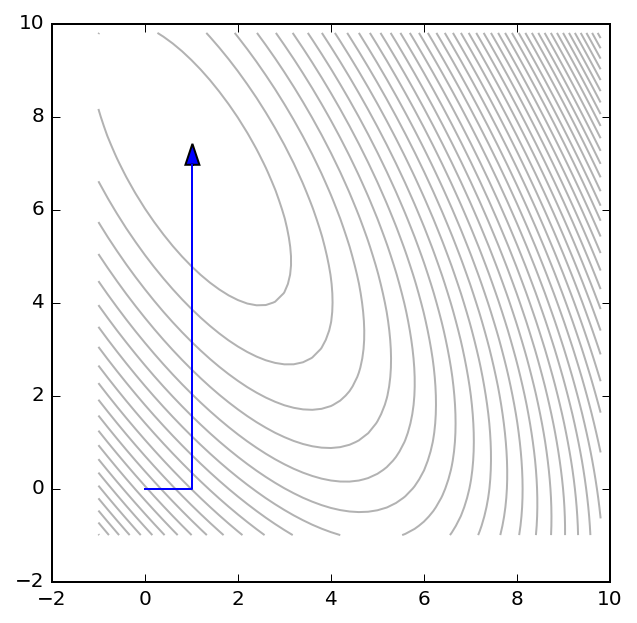

In [34]:
# Coordinate descent!
steps = 100 # how many steps to take
eps = 0.001 # the size of each step

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])

for ii in range(steps):
    ## YOUR CODE HERE ##
    y_est = np.dot(x.T, b_est)
    err = y_est - y
    err_=err.dot(x.T)
    index = np.argmax(np.abs(err_))
    b_est[index] -= eps * err_[index]
    b_est_history[ii+1,:] = b_est

## plot contour of error surface and your regression path
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)

## YOUR CODE HERE ##
plt.plot(b_est_history[:,0], b_est_history[:,1])
plt.arrow(b_est_history[-2,0], b_est_history[-2,1],
          b_est_history[-1,0]-b_est_history[-2,0],b_est_history[-1,1]-b_est_history[-2,1], 
          head_width=0.3)

plt.axis('equal');

### (c) Gradient descent with early stopping (3/3 pts)
One way to regularize your regression solution is to stop doing gradient descent before you make it all the way to the bottom. This is done by checking the error after each step on a separate dataset (here called the validation set). This can be useful when the data is noisy (unlike the situation above, which was noiseless).

For this problem the training features and responses (that you should use to update the weights) are in the variables `trnx` and `trny`. The validation features and responses (that you should use to test your model along the way) are in the variables `valx` and `valy`.

Implement code to do gradient descent here, but now compute and store the mean squared error on both the validation and training datasets after each step. (You don't need to actually stop early, do the same number of steps as before.) 

Then plot the training and validation error as a function of step number. Explain the plot.

Then plot the path that the gradient descent took on top of the error contours. Note that the contours are for the noiseless case, while the data you're using here is noisy.

In [36]:
heldout_data = np.load('gd-heldout.npz')
trnx = heldout_data['trnx']
trny = heldout_data['trny']
valx = heldout_data['valx']
valy = heldout_data['valy']

Best step in held-out set: 86 Weights: [ 2.09646278  5.59716354]
Where gradient descent ended up: [ 2.07825605  6.2273608 ]


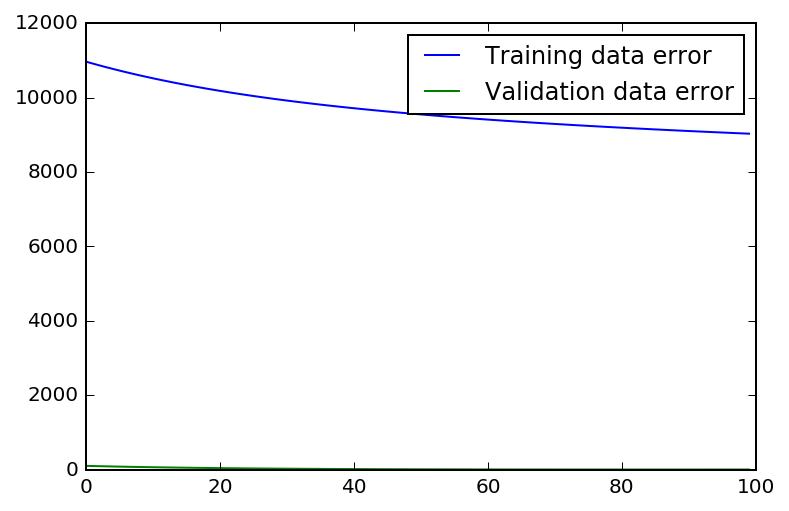

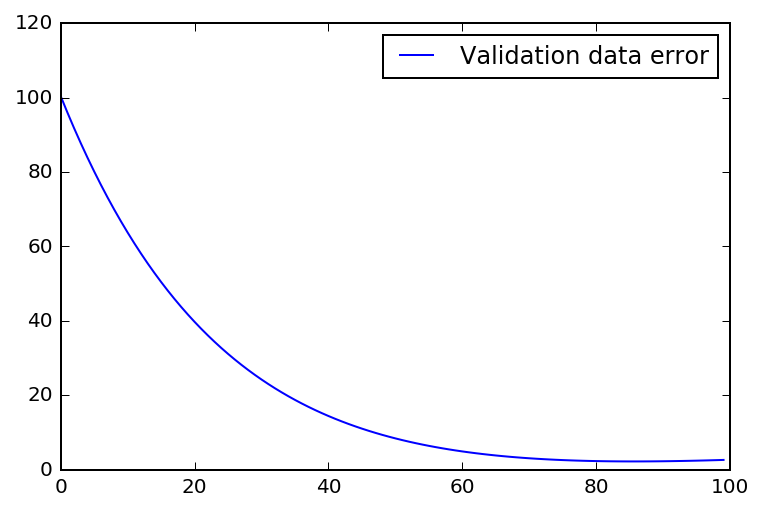

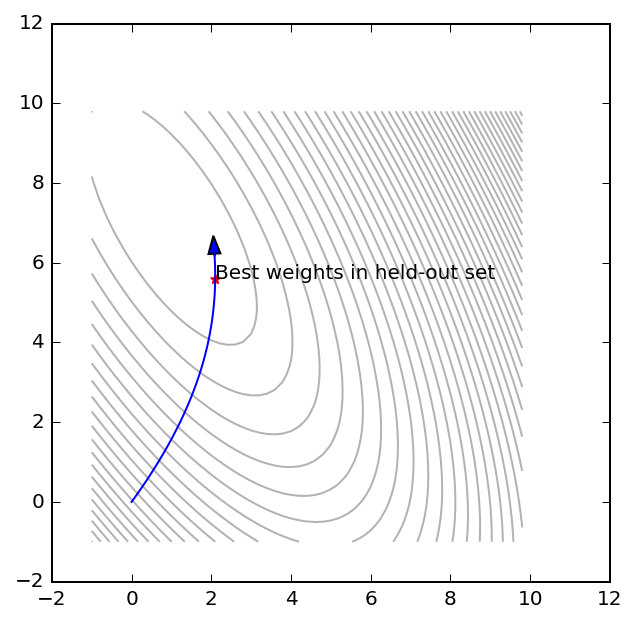

In [37]:
# Gradient descent!

steps = 100
eps = 0.001

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])

trn_err_history = np.zeros([steps])
val_err_history = np.zeros([steps])

for ii in range(steps):
    ## YOUR CODE HERE ##
    trny_est = np.dot(trnx.T, b_est)
    trn_err = trny_est - trny
    trn_err_history[ii] = np.sum(trn_err**2)
    
    valy_est = np.dot(valx.T, b_est)
    val_err = valy_est - valy
    val_err_history[ii] = np.sum(val_err**2)
    
    b_est = b_est -eps * trn_err.dot(trnx.T)/trnx.shape[0]
    b_est_history[ii+1,:] = b_est
       
## plot the training and validation error as a function of step number
plt.figure()
## YOUR CODE HERE ##
plt.plot(np.arange(0, steps), trn_err_history, label = 'Training data error')
plt.plot(np.arange(0, steps), val_err_history, label = 'Validation data error')
plt.legend()
plt.figure()
plt.plot(np.arange(0, steps), val_err_history, label = 'Validation data error')

plt.legend();

print('Best step in held-out set:', val_err_history.argmin(), 'Weights:', b_est_history[val_err_history.argmin()])
print('Where gradient descent ended up:', b_est_history[-1])

## plot the betas along the way
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)

## YOUR CODE HERE ##
plt.plot(b_est_history[:,0], b_est_history[:,1])
plt.arrow(b_est_history[-2,0], b_est_history[-2,1],
          b_est_history[-1,0]-b_est_history[-2,0],b_est_history[-1,1]-b_est_history[-2,1], 
          head_width=0.3)
plt.scatter(b_est_history[val_err_history.argmin()][0],b_est_history[val_err_history.argmin()][1],marker = '*', c = 'r', edgecolor = 'r')
plt.text(b_est_history[val_err_history.argmin()][0],b_est_history[val_err_history.argmin()][1],'Best weights in held-out set')

plt.axis('equal');

_Explain what's going on in the error plots here._

The error function contains not only the error caused by betas, but also by noises. So when the error caused by noises dominates, for example noisy training data, the gradient descent method would not work well. 

<font color=red>
Here the effect would have been much more dramatic if you had taken larger steps (i.e. if you hadn't normalized the gradient by the size of X), but again, that's fine!
</font>

### (c) Coordinate descent with early stopping (3/3 pts)
Similarly, you can do coordinate descent with early stopping (or, at least, testing on another dataset along the way). Do that here.

Best step in held-out set: 64
[ 0.          8.25937192]
Where gradient descent ended up: [  0.          10.77434143]


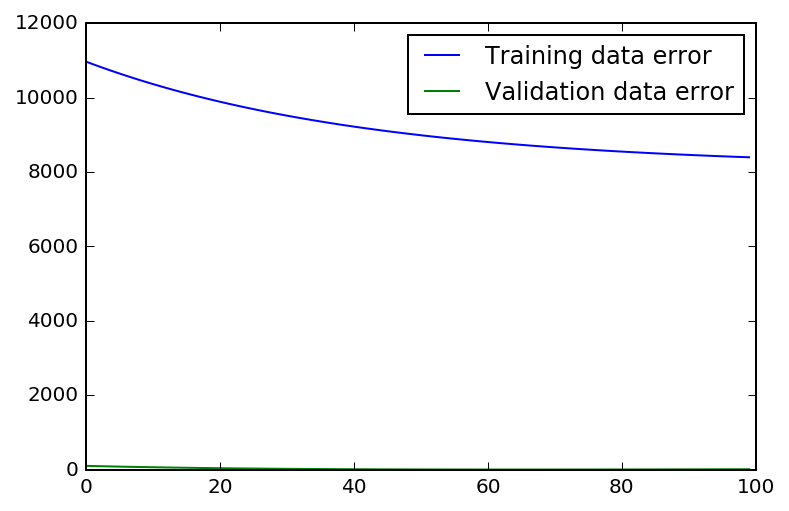

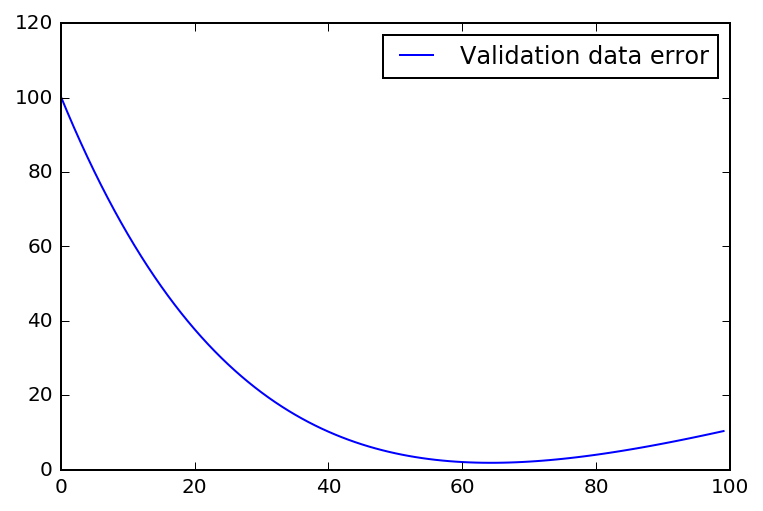

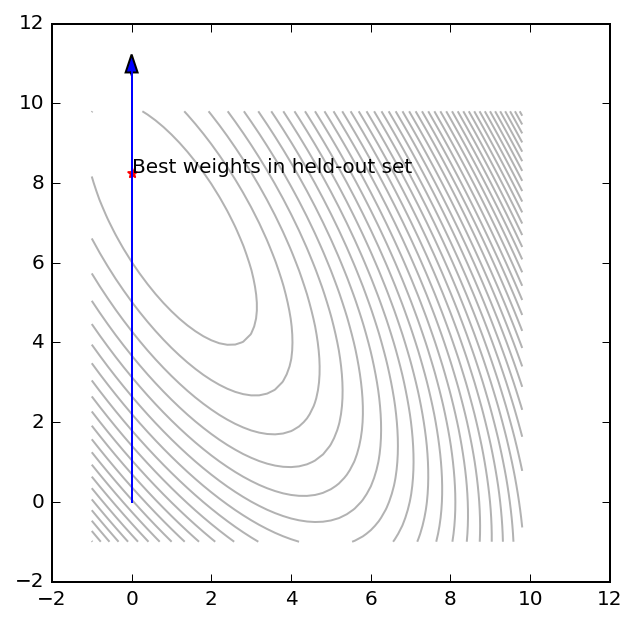

In [38]:
# Coordinate descent!

steps = 100
eps = 0.001

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])
trn_err_history = np.zeros([steps])
val_err_history = np.zeros([steps])

for ii in range(steps):
    ## YOUR CODE HERE ##
    trny_est = np.dot(trnx.T, b_est)
    trn_err = trny_est - trny
    trn_err_history[ii] = np.sum(trn_err**2)
    
    valy_est = np.dot(valx.T, b_est)
    val_err = valy_est - valy
    val_err_history[ii] = np.sum(val_err**2)
    
    trn_err_ = trn_err.dot(trnx.T)
    index = np.argmax(np.abs(trn_err_))
    b_est[index] -= eps * trn_err_[index]
    b_est_history[ii+1,:] = b_est
    
    
    
## plot the training and validation error as a function of step number
plt.figure()
plt.plot(np.arange(0, steps), trn_err_history, label = 'Training data error')
plt.plot(np.arange(0, steps), val_err_history, label = 'Validation data error')
plt.legend()
plt.figure()
plt.plot(np.arange(0, steps), val_err_history, label = 'Validation data error')
## YOUR CODE HERE ##
plt.legend();

print('Best step in held-out set:', val_err_history.argmin())
print(b_est_history[val_err_history.argmin()])
print('Where gradient descent ended up:', b_est_history[-1])

## plot the beta path
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)

## YOUR CODE HERE ##
plt.plot(b_est_history[:,0], b_est_history[:,1])
plt.arrow(b_est_history[-2,0], b_est_history[-2,1],
          b_est_history[-1,0]-b_est_history[-2,0],b_est_history[-1,1]-b_est_history[-2,1], 
          head_width=0.3)
plt.scatter(b_est_history[val_err_history.argmin()][0],b_est_history[val_err_history.argmin()][1],marker = '*', c = 'r', edgecolor = 'r')
plt.text(b_est_history[val_err_history.argmin()][0],b_est_history[val_err_history.argmin()][1],'Best weights in held-out set')


plt.axis('equal');


## Problem 3 - Regression: ordinary least squares (OLS) and ridge on a small problem (6/6 pts)
Now that you've implemented gradient descent and coordinate descent, let's do the easy versions! For this problem you'll be finding analytic solutions to the ordinary least squares (OLS) problem and the ridge problem.

### (a) Solve the (noiseless) 2-feature problem with OLS. (2/2 pts)
Then plot the solution on top of an error contour plot.

Use the features `x` and responses `y` that were defined in the noiseless problem (2a) above.

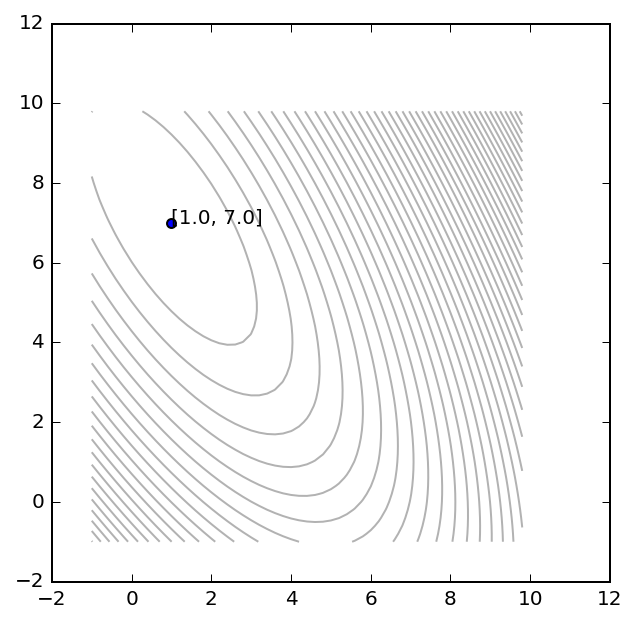

In [39]:
#beta_ols = (y.dot(x.T)-np.sum(y)*np.sum(x, axis=1)/100) / (np.sum(x**2)-(np.sum(x))**2/100)
beta_ols = np.linalg.inv(x.dot(x.T)).dot(x.dot(y))## YOUR CODE HERE ##

plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
## YOUR CODE HERE ##
plt.scatter(beta_ols[0], beta_ols[1])
plt.text(beta_ols[0], beta_ols[1], '[' + str(beta_ols[0])+ ', ' +str(beta_ols[1]) + ']')
plt.axis('equal');

### (b) Solve the (noiseless) 2-feature problem with ridge (4/4 pts)
Solve the regression problem using features `x` and responses `y` using ridge. Test the different ridge regularization coefficients (lambdas) given here. For each lambda, store the betas that you find. Then plot the resulting beta path on top of an error contour plot.

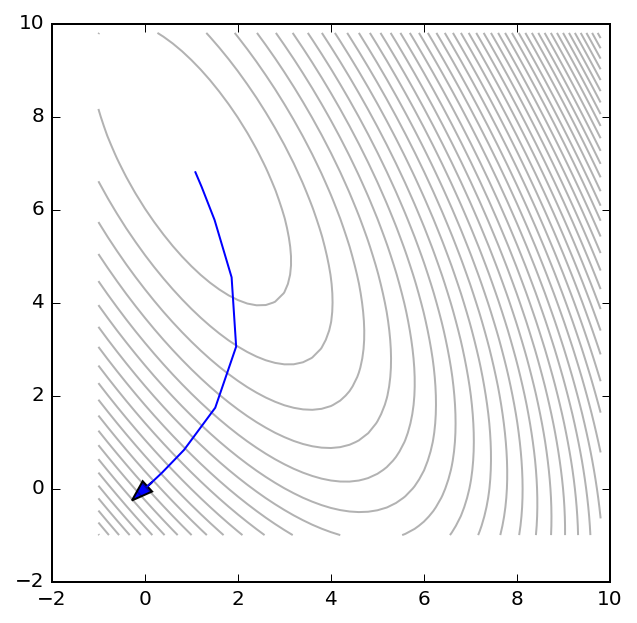

In [40]:
lambdas = np.logspace(0, 4, 10)
betas_ridge = np.zeros((len(lambdas), 2))
for ii in range(len(lambdas)):
    ## YOUR CODE HERE ##
    M = x.dot(x.T) + lambdas[ii] * np.eye(len(x),dtype = int)
    betas_ridge[ii] = (np.linalg.inv(M).dot(x)).dot(y)
    #print(mean_squared_error(y, x.T.dot(betas_ridge[ii])), lambdas[ii], betas_ridge[ii])

## Plot the ridge solutions on the error contours
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)

## YOUR CODE HERE ##
plt.plot(betas_ridge[:, 0], betas_ridge[:, 1])
plt.arrow(betas_ridge[-2,0], betas_ridge[-2,1],
          betas_ridge[-1,0]-betas_ridge[-2,0],betas_ridge[-1,1]-betas_ridge[-2,1], 
          head_width=0.3)

plt.axis('equal');

## Problem 4 - Regression on a high-dimensional problem (8/8 pts)
For the last problem you're going to do regression on a dataset with lots of features and noise as well!

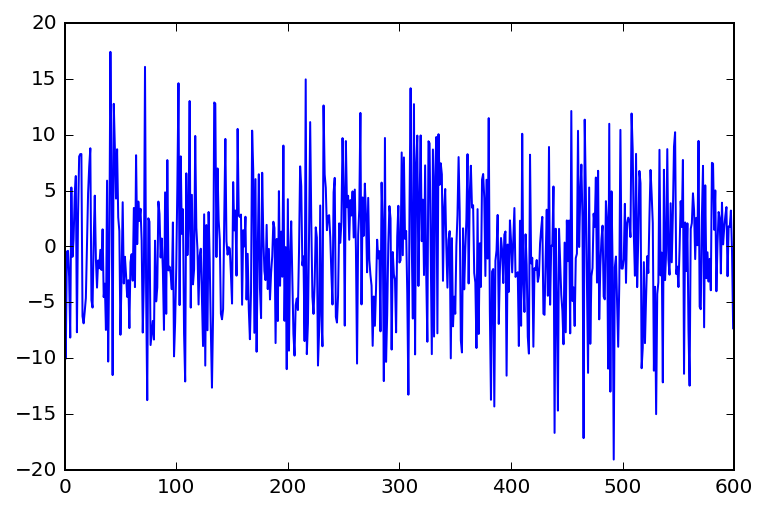

In [41]:
# Generate high-dimensional data

n_features = 400 # the number of features
n_timepoints = 600 # the number of timepoints
n_training = 450 # the number of timepoints that we'll use for training
noise_level = 5.0 # how much noise to add

# generate the "true" betas, the ones that will be used to generate the data
beta_true = np.random.randn(n_features)

# generate the feature matrix, x
# this uses a trick to make the different features in x be pretty correlated
u,s,vh = np.linalg.svd(np.random.randn(n_timepoints, n_features), full_matrices=False)
x_all = (u*(s**5)).dot(vh)
x_all /= x_all.max()

# generate the responses, y = x . beta + noise
y_all = x_all.dot(beta_true) + np.random.randn(n_timepoints) * noise_level

# split x and y into training part (first n_training timepoints) ..
x = x_all[:n_training]
y = y_all[:n_training]

# .. and validation part (remaining timepoints)
x_val = x_all[n_training:]
y_val = y_all[n_training:]


# plot y, let's see what it looks like
plt.plot(y_all);

### (a) How well could we possibly do at this problem? (3/3 pts)

#### i. Define a function to compute the mean squared error (MSE) between a signal $z$ and its estimate $\hat{z}$ (1/1 pt) 

In [42]:
def mean_squared_error(z, z_hat):
    return ((z-z_hat)**2).mean(axis=None)## YOUR CODE HERE ##

#### ii. What is the minimum possible MSE on the training set and on the validation set? (1/1 pt)

In [43]:
best_trn_mse = np.min( mean_squared_error(y, x.dot(beta_true)) ) ## YOUR CODE HERE ##
best_val_mse = np.min( mean_squared_error(y_val, x_val.dot(beta_true)) )## YOUR CODE HERE ##

print('Best possible MSE on training set:')
print(best_trn_mse)

print('Best possible MSE on validation set:')
print(best_val_mse)


Best possible MSE on training set:
27.2050928679
Best possible MSE on validation set:
25.6243640959


#### iii. What would MSE be on the training and validation sets if all $\beta=0$? (1/1 pt)

In [44]:
betazero_trn_mse = np.min( mean_squared_error(y, 0) ) ## YOUR CODE HERE ##
betazero_val_mse = np.min( mean_squared_error(y_val, 0) )## YOUR CODE HERE ##

print('MSE on training set with beta=0:')
print(betazero_trn_mse)

print('MSE on validation set with beta=0:')
print(betazero_val_mse)

MSE on training set with beta=0:
35.6494209224
MSE on validation set with beta=0:
35.8079949447


### (b) Solve the high-dimensional problem with OLS (1/1 pt)
(Note that the feature matrix `x` is transposed here as compared to problem 3.)

If you do this right, the training error should be _way_ better than the minimum possible. That is truly incredible. Unbelievable. Literally. And the validation error is much worse than what you would get from just guessing that $\beta=0$. Explain why below.

In [45]:
#beta_ols = (x.T.dot(y)-np.sum(y)*np.sum(x.T,axis=1)/len(x)) / (np.sum(x**2, axis=None)-(np.sum(x, axis=None))**2/len(x))## YOUR CODE HERE ##
beta_ols = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))## YOUR CODE HERE ##
y_hat = x.dot(beta_ols)## YOUR CODE HERE ##
y_val_hat = x_val.dot(beta_ols)## YOUR CODE HERE ##

print('Training MSE:', mean_squared_error(y, y_hat))

print('Validation MSE:', mean_squared_error(y_val, y_val_hat))

Training MSE: 4.21167568496
Validation MSE: 181.85281619


_Explain what the heck is going on here._

As the $beta_{ols}$ is trained with training data, all the parameters of $\beta_{ols}$ fit the training data very well, but they can't fit validation data in the case of high noise level. I tried changing the noise level from 5.0 to 0.5, here is the result:

Best possible MSE on training set:
0.24943397949

Best possible MSE on validation set:
0.264277458848

$\beta = 0$

MSE on training set with beta=0:
12.5716402858

MSE on validation set with beta=0:
13.5738756471


ols $\beta_{ols}$

Training MSE: 0.0266481884861     

Validation MSE: 1.5914098028

We can see, in the case of low noise level, the $\beta_{ols}$ trained with training data can fit validation data very well.

<font color=red>
Nice! Yes, OLS only overfits a lot in this case when there is a lot of noise.
</font>

### (b) Solve high-dimensional problem with ridge (5/5 pts)

#### i. Solve the regression problem $y = x \beta$ using ridge regression. Try the different ridge coefficients (lambdas) as given here. For each lambda, store the MSE on the training dataset, the MSE on the validation dataset, and the betas. (2/2 pts)
(Note again that `x` is transposed relative to problem 3.)

In [46]:
lambdas = np.logspace(-3, 5, 10) # let's check 10 lambdas between 10^-3 and 10^5. play with this range if you like
betas_ridge = np.zeros((len(lambdas), n_features))
trn_mse = np.zeros(len(lambdas))
val_mse = np.zeros(len(lambdas))

for ii in range(len(lambdas)):
    ## YOUR CODE HERE ##
    M = x.T.dot(x) + lambdas[ii] * np.eye(len(x.T), dtype = int)
    betas_ridge[ii] = (np.linalg.inv(M).dot(x.T)).dot(y)
    y_hat = x.dot(betas_ridge[ii])
    y_val_hat = x_val.dot(betas_ridge[ii])
    trn_mse[ii] = mean_squared_error(y, y_hat)
    val_mse[ii] = mean_squared_error(y_val, y_val_hat)

#### ii. Plot the training MSE and validation MSE as a function of lambda. Plot horizontal lines that show the theoretical minimum and maximum MSE (i.e. when beta=0) on the validation set, which you computed above. Explain what you see. (2/2 pts)

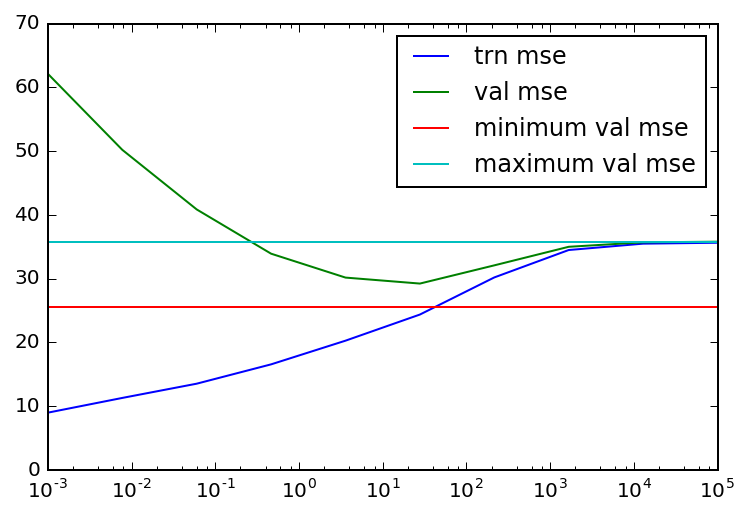

In [49]:
## YOUR CODE HERE ##
fig = plt.figure()
plt.semilogx(lambdas, trn_mse, label = 'trn mse')
plt.semilogx(lambdas, val_mse, label = 'val mse')
plt.semilogx(lambdas, np.ones(len(lambdas)) * best_val_mse, label = 'minimum val mse')
plt.semilogx(lambdas, np.ones(len(lambdas)) * np.min( mean_squared_error(y_val, 0) ), label = 'maximum val mse')
plt.legend()

_Explanation here._

Validation MSE would decrease as $\lambda$ incresing from $10^{-4}$ to $10^{1}$, and then increase as $\lambda$ continuing increasing. That means here is a best $\lambda$ to let validation MSE minimum but it's not the minimum or maximum $\lambda$, which matches the theoretical result on Wikipedia.

#### iii. For each feature, plot its weight (beta) as a function of lambda. Put all of these on the same plot. Explain what you see. (1/1 pt)

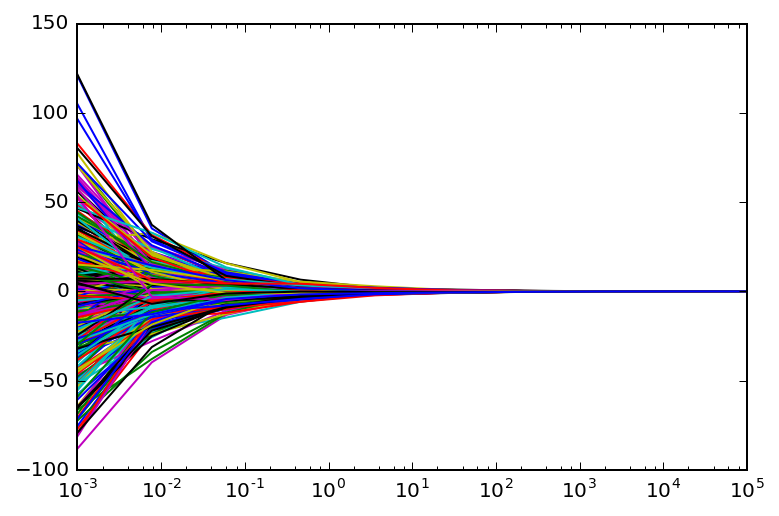

In [50]:
## YOUR CODE HERE ##
plt.figure()
for ii in range(n_features):
    plt.semilogx(lambdas, betas_ridge[:,ii])

_Explanation here._

When $\lambda \rightarrow \infty$, $\hat\beta \rightarrow 0$, which matches the theoretical result on Wikipedia.